Подключаем библиотеки и считываем данные, полученные в результате эксперимента. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
data = pd.read_csv("result.csv")

In [37]:
data.head()

,image,distance,angle_x,angle_y,angle_z,found,ID,length
0,1,2.33801,-14.2843,1.008160,-89.1960,1,43,0.156
1,2,2.29431,-61.1354,1.602070,-89.6140,1,43,0.156
2,3,0.00000,0.0000,0.000000,0.0000,0,0,0.156
3,4,2.92523,47.1487,-0.092078,-89.9108,1,43,0.156
4,5,3.21416,65.4330,0.203426,-89.6737,1,43,0.156


In [41]:
data.describe()

,image,distance,angle_x,angle_y,angle_z,found,ID,length
count,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000
mean,1270.500000,2.074933,0.041756,0.930597,-22.500585,0.749213,100.597244,0.120256
std,733.379165,1.997512,23.736605,15.756694,61.166543,0.433552,78.144651,0.051066
min,1.000000,0.000000,-83.019100,-82.085600,-89.999500,0.000000,0.000000,0.033000
25%,635.750000,0.000000,-4.625253,-1.567005,-88.713650,0.000000,0.000000,0.076000
50%,1270.500000,1.676630,0.000000,0.000000,-0.018715,1.000000,134.000000,0.156000
75%,1905.250000,2.995773,3.653760,3.896980,0.000000,1.000000,154.000000,0.156000
max,2540.000000,10.006700,89.842600,80.370400,89.999600,1.000000,234.000000,0.156000


In [28]:
data.found.value_counts()

1    1903
0     637
Name: found, dtype: int64

In [92]:
data.ID.value_counts()

0      637
149    531
232    142
166    141
102    126
10     109
65      94
157     88
134     82
12      81
154     78
234     75
168     74
97      73
123     71
190     70
43      60
17       3
22       2
120      1
91       1
226      1
Name: ID, dtype: int64

Всего было обработано 2540 фотографий. В результате работы программы было распознано 1903 маркера и не распознано 637. Однако, заметим, что некоторые маркеры были ошибочно распознаны. Это можно понять, сравнив полученные ID с теми, которые были сгенерированы.

In [94]:
ID4 = [12, 43, 134, 166]
ID5 = [102, 149, 168, 234]
ID6 = [97, 123, 157, 232]
ID7 = [10, 65, 154, 190]

# мы можем использовать значения 4, 5, 6, 7, т.к. они отсутствуют в полученных ID.
data.loc[data['ID'].isin(ID4), 'ID'] = 4
data.loc[data['ID'].isin(ID5), 'ID'] = 5
data.loc[data['ID'].isin(ID6), 'ID'] = 6
data.loc[data['ID'].isin(ID7), 'ID'] = 7

data.ID.value_counts()

5      806
0      637
6      374
4      364
7      351
17       3
22       2
120      1
226      1
91       1
Name: ID, dtype: int64

Избавимся от ошибочных значений, изменив в этих строчках значения "distance", "angle_x", "angle_y", "angle_z", "found", "ID" на 0.

In [96]:
data.loc[data['ID'] > 7, ['distance', 'angle_x', 'angle_y', 'angle_z', 'found', 'ID']] = 0

Пока что, для столбцов "distance", "angle_x", "angle_y", "angle_z", "ID" в строках, где маркер не был распознан стоят 0.

Исследуем зависимость распознавания от длины стороны маркера ("length"). Для этого разделим данные на изображения с распознанными маркерами и изображения без распознанных маркеров и отсечем нерассматриваемые характеристики.

In [99]:
length = data.length
not_found = data[data.found == 0].length
found = data[data.found == 1].length

In [100]:
length.value_counts()

0.156    1644
0.033     526
0.076     249
0.105     121
Name: length, dtype: int64

Заметим, что фотографии с разным масштабом распределены неравномерно. Например, фотографий с масштабом 0.156 в 3 и более раз больше, чем остальных. Поэтому, нужно исследовать каждый масштаб отдельно и сравнить процент распознанных и нераспознанных маркеров в каждой категории.

In [101]:
found.value_counts()

0.156    1363
0.033     247
0.076     171
0.105     114
Name: length, dtype: int64

In [102]:
not_found.value_counts()

0.156    281
0.033    279
0.076     78
0.105      7
Name: length, dtype: int64

In [103]:
all_counts = length.value_counts().tolist()
found_counts = found.value_counts().tolist()
not_found_counts = not_found.value_counts().tolist()

found_per = [i / j * 100 for i, j in zip(found_counts, all_counts)]
print(found_per)

not_found_per = [i / j * 100 for i, j in zip(not_found_counts, all_counts)]
print(not_found_per)

[82.90754257907543, 46.958174904942965, 68.67469879518072, 94.21487603305785]
[17.092457420924575, 53.041825095057035, 31.32530120481928, 5.785123966942149]


Для наглядности изобразим на графиках

array([[<AxesSubplot:title={'center':'found'}>]], dtype=object)

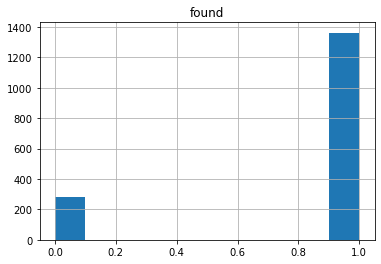

In [105]:
len4 = data.loc[data['length'] == 0.156, ['found']] 

len4.hist()

array([[<AxesSubplot:title={'center':'found'}>]], dtype=object)

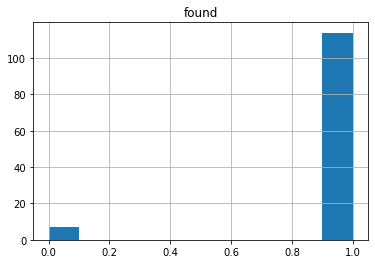

In [106]:
len3 = data.loc[data['length'] == 0.105, ['found']] 

len3.hist()

array([[<AxesSubplot:title={'center':'found'}>]], dtype=object)

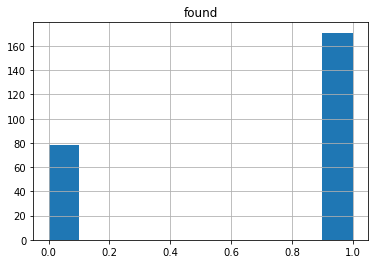

In [107]:
len2 = data.loc[data['length'] == 0.076, ['found']] 

len2.hist()

array([[<AxesSubplot:title={'center':'found'}>]], dtype=object)

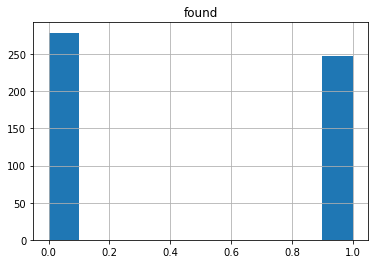

In [108]:
len4 = data.loc[data['length'] == 0.033, ['found']] 

len4.hist()

<AxesSubplot:>

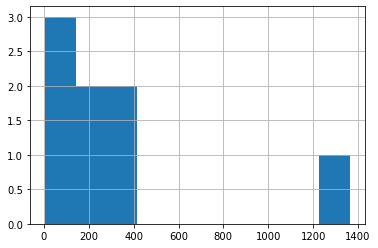

In [112]:
groups = data.groupby(['length', 'found']).count().



Заметим, что большая часть маркеров больших масштабов 0.156 и 0.105 была распознана (соответственно, 83% и 94%), в отличие от маркеров меньших масштабов. При этом при масштабе 0.076 было распознано почти 70% маркеров, а вот при масштабе 0.033 большую часть маркеров не удалось обнаружить (53%).

Из этого можно сделать вывод, что для распознавания в реальных условиях лучше использовать маркеры больших размеров, как минимум, начиная с масштаба 0.076, т.к. маркеры маленького размера в большинстве случаев распознаются неудачно.